In [1]:
%load_ext autoreload
%autoreload 2

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
from torchvision import datasets, transforms
from tqdm import tqdm
from scipy.spatial.distance import euclidean

# import the project root
sys.path.insert(0, '../..')
from src.covertree import CoverTree 
from src.dyadictree import DyadicTree
from src.wavelettree import WaveletTree
from src.utils import *

In [2]:
def load_dataset(flatten=False):
    num_points =30 
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    cifar10_train = datasets.MNIST(root='../../datasets', train=True, download=True, transform=transform)
    X = np.stack([np.array(img[0].numpy()) for img in cifar10_train][:num_points])  # shape: (1000, 3, 32, 32)

    original_shape = X.shape
    if flatten:
        X = X.reshape(X.shape[0], -1)
    # print(X.shape)
    return X, original_shape    

X, original_shape = load_dataset(flatten=True)
p_n_points = X.shape[0]
print("X shape: %s" % str(X.shape))
print(p_n_points)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 56.6MB/s]


Extracting ../../datasets/MNIST/raw/train-images-idx3-ubyte.gz to ../../datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.96MB/s]


Extracting ../../datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ../../datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 15.3MB/s]


Extracting ../../datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.14MB/s]


Extracting ../../datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../datasets/MNIST/raw

X shape: (30, 784)
30


In [3]:
from scipy.spatial.distance import euclidean
python_covertree =  CoverTree(X, euclidean, leafsize=1)
mydiadic_tree    =  DyadicTree(python_covertree)
# wavelet_tree = WaveletTree(mydiadic_tree, X, 0, X.shape[-1], inverse=True,
#                            thresholds=0) # inverse means data in (n,d) formatdj

In [4]:
# gmra_q_coeff = wavelet_tree.fgwt(X)
# X_recon      = wavelet_tree.igwt(gmra_q_coeff, X.shape).reshape(original_shape)
# print("X_recon shape: %s" % str(X_recon.shape))

In [5]:
# fig, ax = plt.subplots(2, 10, figsize=(20, 4))
# for i in range(10):
#     ax[0, i].imshow(X[i].reshape(28, 28), cmap='gray')
#     ax[1, i].imshow(X_recon[i].reshape(28, 28), cmap='gray')


In [6]:
mydiadic_tree.idx_to_leaf_node[0]

In [7]:
# mydiadic_tree.traverse()

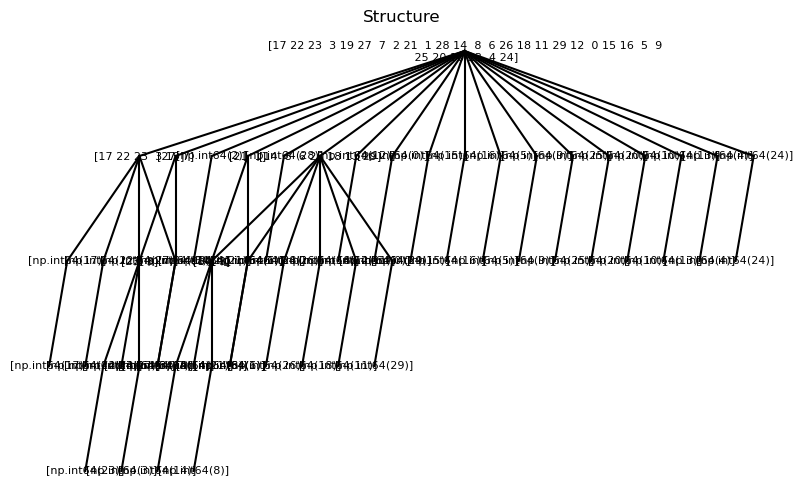

In [8]:
mydiadic_tree.plot_tree()

In [9]:
mydiadic_tree.grow_tree()

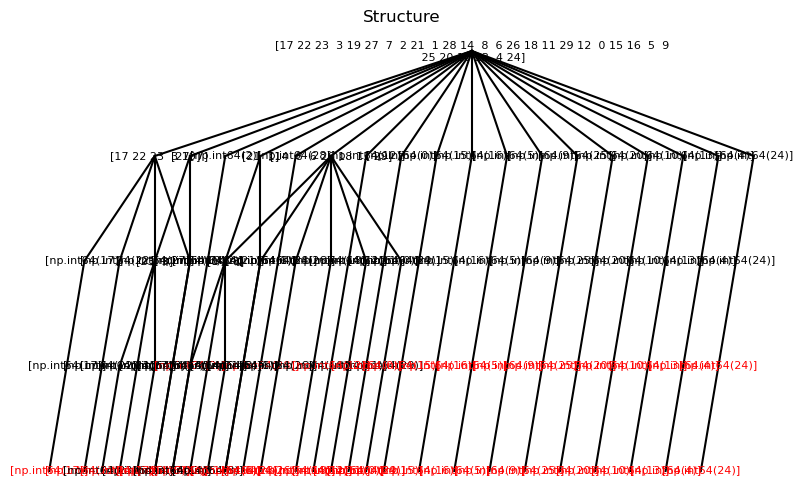

In [10]:
mydiadic_tree.plot_tree()

In [11]:
mydiadic_tree.idx_to_leaf_node[19]

In [12]:
node =  mydiadic_tree.idx_to_leaf_node[19]
print(node.idxs, node.fake_node)
while node.parent is not None:
    node = node.parent
    print(node.idxs, node.fake_node)

[np.int64(19)] True
[np.int64(19)] False
[np.int64(19)] False
[17 22 23  3 19] False
[17 22 23  3 19 27  7  2 21  1 28 14  8  6 26 18 11 29 12  0 15 16  5  9
 25 20 10 13  4 24] False


In [13]:
node.parent

In [14]:
# print the level of every leaf

def print_leaf_levels(tree):
    for idx, node in tree.idx_to_leaf_node.items():
        print(f"Leaf {idx} is at level {node.level}")

In [15]:
X.shape

(30, 784)

In [16]:
# x query random 5 x 784
X_query = X[np.random.choice(X.shape[0], 5, replace=False)]

In [17]:
# query and get the idx of the closest leaf node
_,nn_idx = python_covertree.query(X_query)

In [18]:
nn_idx

array([ 3, 13, 12, 17,  1])

In [19]:
leaves = mydiadic_tree.query_leaf(X_query)

In [20]:
node = leaves[0]
print(node)
while node.parent is not None:
    node = node.parent
    print(node)